# Notebook 1 - Fondamentaux Python pour l'IA
# Analyse de données météorologiques en temps réel

🎯 Objectifs pédagogiques

Maîtriser les structures de données Python essentielles
Consommer des APIs REST avec requests
Manipuler des données JSON et CSV
Créer des visualisations basiques
Appliquer des statistiques descriptives

🌤️ Contexte du projet

Vous travaillez pour une startup AgTech qui développe des solutions d'agriculture intelligente. Votre mission : analyser les données météorologiques de plusieurs villes européennes pour optimiser les recommandations de plantation.

Partie 1 : Connexion aux APIs météo

🔧 Installation des bibliothèques


 À exécuter dans votre terminal ou cellule
# pip install requests pandas matplotlib seaborn numpy

In [120]:
#📥 Import et configuration
import requests as r
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from dotenv import load_dotenv
import os
import json
import time

🌍 API OpenWeatherMap (gratuite)

Inscription : Créez un compte sur openweathermap.org


Clé API : Récupérez votre clé gratuite (40 000 appels/mois)



In [121]:
# ### 💡 Première requête guidée
load_dotenv() # charge les clés de .env dans les variables d'environnement
API_KEY = os.getenv("OPENWEATHER_API_KEY")
BASE_URL = "https://api.openweathermap.org/data/2.5"

def get_weather_data(city, api_key):
    """
    Récupère les données météo actuelles pour une ville

    Étapes à compléter :
    1. Construire l'URL avec les paramètres
    2. Faire l'appel API avec requests.get()
    3. Vérifier le status code
    4. Retourner les données JSON
    """
    # URL : current weather data
    url = f"{BASE_URL}/weather"

    # Paramètres à compléter
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric',  # Celsius
        'lang': 'fr'
    }

    try:
        response = r.get(url, params=params)
        response.raise_for_status() # Vérifie si status code est 200, sinon lève une exception

        data = response.json()
        return data
    except r.HTTPError as http_err:
        print(f"Http Error: {http_err}\nStatus code: {r.status_codes}")
    except r.Exception.ConnectionError as cn_error:
        print(f"Error: {cn_error}")
    return None 
    # Votre code ici pour l'appel API
    # Gérez les erreurs HTTP !
get_weather_data("Montpellier",API_KEY)
 # Remplacez par votre implémentation

{'coord': {'lon': 3.8772, 'lat': 43.6109},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'ciel dégagé',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 26.71,
  'feels_like': 26.21,
  'temp_min': 26.71,
  'temp_max': 26.71,
  'pressure': 1016,
  'humidity': 29,
  'sea_level': 1016,
  'grnd_level': 1008},
 'visibility': 10000,
 'wind': {'speed': 10.29, 'deg': 330},
 'clouds': {'all': 0},
 'dt': 1753782349,
 'sys': {'type': 1,
  'id': 6518,
  'country': 'FR',
  'sunrise': 1753763426,
  'sunset': 1753816277},
 'timezone': 7200,
 'id': 2992166,
 'name': 'Montpellier',
 'cod': 200}

In [122]:
# Configuration API
API_KEY = os.getenv("OPENWEATHER_API_KEY")  # Remplacez par votre vraie clé
BASE_URL = "http://api.openweathermap.org/data/2.5"

# Villes à analyser (agriculture européenne)
CITIES = ["Paris,FR", "Berlin,DE", "Madrid,ES", "Rome,IT", "Amsterdam,NL", "Vienna,AT"]

get_weather_data(CITIES[3], API_KEY)

{'coord': {'lon': 12.4839, 'lat': 41.8947},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'ciel dégagé',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 26.66,
  'feels_like': 26.66,
  'temp_min': 25.88,
  'temp_max': 28.09,
  'pressure': 1009,
  'humidity': 49,
  'sea_level': 1009,
  'grnd_level': 1000},
 'visibility': 10000,
 'wind': {'speed': 5.66, 'deg': 20},
 'clouds': {'all': 0},
 'dt': 1753782065,
 'sys': {'type': 1,
  'id': 6796,
  'country': 'IT',
  'sunrise': 1753761642,
  'sunset': 1753813930},
 'timezone': 7200,
 'id': 3169070,
 'name': 'Rome',
 'cod': 200}

**Questions de débogage :**
- Que faire si l'API retourne une erreur 401 ?
- Comment gérer une ville introuvable ?

---

1. Erreur 401 Unauthorized — API-clé:
    absent, incorrect, révoquée par website
2. Erreur 404 Not Found — Ville :
    Introuvable, mal orthographiée ou non disponible dans l’API.

**Comment gérer?**
    
     try:
        response = r.get(url, params=params)
        response.raise_for_status() # Vérifie si status code est 200, sinon lève une exception

        data = response.json()
        return data
    except r.HTTPError as http_err:
        print(f"Http Error: {http_err}")
    return None

## Partie 2 : API complémentaire - Données historiques

### 📊 API Visual Crossing Weather (gratuite)
Alternative avec 1000 appels/jour gratuits : [visualcrossing.com](https://www.visualcrossing.com/weather-api)

In [ ]:
# Configuration Visual Crossing
load_dotenv() # charge les clés de .env dans les variables d'environnement
VC_API_KEY = os.getenv("VISUAL_CROSSING_API")
VC_BASE_URL = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline"

def get_historical_weather(city, start_date, end_date, api_key):
    """
    Récupère les données météo historiques

    Défis à résoudre :
    1. Construire l'URL avec les dates
    2. Gérer la pagination si nécessaire
    3. Extraire les données pertinentes du JSON complexe
    4. Convertir en DataFrame pandas
    """

    url = f"{VC_BASE_URL}/{city}/{start_date}/{end_date}"

    params = {
        'key': api_key,
        'include': 'days',
        'elements': 'datetime,temp,humidity,precip,windspeed',
        'unitGroup': 'metric' #Celsius
    }

    # Votre implémentation ici
    # Pensez à la gestion d'erreurs !
    try:
        response = r.get(url, params=params)
        # response.raise_for_status() # Vérifie si status code est 200, sinon lève une exception
        if response.status_code != 200:
            print(response.text)
            return None

        data = response.json()
        return data
    except r.HTTPError as http_err:
        print(f"Http Error: {http_err}")
    except r.exceptions.ConnectionError as cn_error:
        print(f"Error: {cn_error}")
    return None 

all_df_data = []

for city in CITIES:
    data = get_historical_weather(city, "2024-07-01", "2024-07-30", VC_API_KEY)
    if data:
        df_data_days = data['days']
        df_data = pd.DataFrame(df_data_days)[["datetime", "temp", "humidity", "precip", "windspeed"]]
        df_data.rename(columns={
            "datetime": "date",
            "temp": "temperature",
            "humidity": "humidite",
            "precip": "precipitation",
            "windspeed": "vent"
        }, inplace=True)

        df_data.insert(1, "ville", city)
        all_df_data.append(df_data)

df_final = pd.concat(all_df_data, ignore_index=False)
df_final = df_final.sort_values(by=["date", "ville"]).reset_index(drop=True)

df_final

,date,ville,temperature,humidite,precipitation,vent
0,2024-07-01,"Amsterdam,NL",15.8,75.4,0.203,24.6
1,2024-07-01,"Berlin,DE",17.5,84.5,5.597,16.5
2,2024-07-01,"Madrid,ES",23.3,49.2,0.000,17.6
3,2024-07-01,"Paris,FR",18.1,66.3,0.162,16.4
4,2024-07-01,"Rome,IT",25.2,71.9,0.038,20.4
...,...,...,...,...,...,...
175,2024-07-30,"Berlin,DE",20.1,62.4,0.000,10.2
176,2024-07-30,"Madrid,ES",30.8,32.3,0.259,22.9
177,2024-07-30,"Paris,FR",28.1,58.5,0.000,9.2
178,2024-07-30,"Rome,IT",30.2,49.9,0.000,20.7


### 🎯 Mission pratique
Récupérez les données des 30 derniers jours pour toutes vos villes et créez un DataFrame consolidé.

**Structure attendue :**
```
| date       | ville     | temperature | humidite | precipitation | vent |
|------------|-----------|-------------|----------|---------------|------|
| 2024-01-01 | Paris     | 12.5        | 75       | 2.3          | 15   |
```

---


In [124]:
### 🗺️ Obtenir les coordonnées
def get_city_coordinates(city, api_key):
    """
    Utilise l'API Geocoding d'OpenWeatherMap
    URL : http://api.openweathermap.org/geo/1.0/direct

    Récupérez lat/lon pour chaque ville
    """
    BASE_URL = "http://api.openweathermap.org/geo/1.0/direct"
    params = {
        'q': city,
        'limit': 1,
        'appid': api_key
    }

    try:
        response = r.get(BASE_URL, params=params)
        response.raise_for_status() # Vérifie si status code est 200, sinon lève une exception
        data = response.json()

        if data:
            lat = data[0]['lat']
            lon = data[0]['lon']
            return lat, lon
        else:
            print(f"Aucune coordonnée trouvée pour: {city}")
            return None, None
    except Exception as i:
        print(f"Erreur lors de la récupération des coordonnées: {i}")
        return None, None

all_coords = {}

for city in CITIES:
    lat, lon = get_city_coordinates(city, API_KEY)
    if lat is not None and lon is not None:
        all_coords[city] = (lat, lon)
    else:
         print(f"Impossible d'obtenir les coordonnées pour la ville: {city}")
print(all_coords)

{'Paris,FR': (48.8588897, 2.3200410217200766), 'Berlin,DE': (52.5170365, 13.3888599), 'Madrid,ES': (40.4167047, -3.7035825), 'Rome,IT': (41.8933203, 12.4829321), 'Amsterdam,NL': (52.3727598, 4.8936041), 'Vienna,AT': (48.2083537, 16.3725042)}


In [125]:
# ## Partie 3 : API supplémentaire - Qualité de l'air

# ### 🌬️ API OpenWeatherMap Air Pollution
def get_air_quality(lat, lon, api_key):
    """
    Récupère les données de qualité de l'air

    URL : http://api.openweathermap.org/data/2.5/air_pollution

    Étapes :
    1. Utiliser les coordonnées lat/lon des villes
    2. Récupérer l'indice AQI et les composants (PM2.5, PM10, O3, etc.)
    3. Joindre ces données avec vos données météo
    """

    BASE_URL = "http://api.openweathermap.org/data/2.5/air_pollution"
    params = {
        'lat': lat,
        'lon': lon,
        'appid': api_key
    }

    try:
        response = r.get(BASE_URL, params=params)
        response.raise_for_status() # Vérifie si status code est 200, sinon lève une exception
        data = response.json()

        #Extraction des données importantes
        aqi = data['list'][0]['main']['aqi']
        components = data['list'][0]['components']

        return {
            "aqi": aqi,
            **components
        }

    except r.HTTPError as http_err:
        print(f"Http Error: {http_err}")
    except r.exceptions.ConnectionError as cn_error:
        print(f"Error: {cn_error}")
    return None 

def get_air_quality2(CITIES, df_final, api_key):
    air_qual_data = []

    for city in CITIES:
        lat, lon = get_city_coordinates(city, api_key)
        if lat is not None and lon is not None:
            qual = get_air_quality(lat, lon, api_key)
            if qual:
                # Ajouter la ville et la qualité de l'air à la liste
                qual['ville'] = city
                air_qual_data.append(qual)

                air_qual_df = pd.DataFrame(air_qual_data)

    if df_final is not None:
        # Nous combinons avec les données météorologiques de la colonne « ville ».
        combined_df = pd.merge(df_final, air_qual_df, on='ville', how='left')
        return combined_df

    return air_qual_df
df_with_air_qual = get_air_quality2(CITIES, df_final, API_KEY)
df_with_air_qual

,date,ville,temperature,humidite,precipitation,vent,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2024-07-01,"Amsterdam,NL",15.8,75.4,0.203,24.6,1,151.33,2.27,11.18,56.70,3.28,4.12,5.76,2.92
1,2024-07-01,"Berlin,DE",17.5,84.5,5.597,16.5,2,120.05,0.40,1.34,64.25,0.68,0.76,1.22,1.33
2,2024-07-01,"Madrid,ES",23.3,49.2,0.000,17.6,2,110.88,0.22,0.94,85.13,0.10,1.14,2.45,2.76
3,2024-07-01,"Paris,FR",18.1,66.3,0.162,16.4,2,122.45,0.18,0.89,71.97,0.29,1.65,2.47,1.31
4,2024-07-01,"Rome,IT",25.2,71.9,0.038,20.4,2,116.89,0.11,0.58,87.85,0.48,2.94,8.56,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2024-07-30,"Berlin,DE",20.1,62.4,0.000,10.2,2,120.05,0.40,1.34,64.25,0.68,0.76,1.22,1.33
176,2024-07-30,"Madrid,ES",30.8,32.3,0.259,22.9,2,110.88,0.22,0.94,85.13,0.10,1.14,2.45,2.76
177,2024-07-30,"Paris,FR",28.1,58.5,0.000,9.2,2,122.45,0.18,0.89,71.97,0.29,1.65,2.47,1.31
178,2024-07-30,"Rome,IT",30.2,49.9,0.000,20.7,2,116.89,0.11,0.58,87.85,0.48,2.94,8.56,1.28



## Partie 4 : Analyse et visualisation

### 📈 Analyses à réaliser

1. **Comparaison inter-villes**
   - Températures moyennes par ville
   - Variabilité climatique (écart-type)
   - Corrélations température/humidité

2. **Tendances temporelles**
   - Évolution sur 30 jours
   - Identification des patterns

3. **Qualité de l'air vs météo**
   - Impact de la pluie sur la pollution
   - Corrélations vent/qualité de l'air

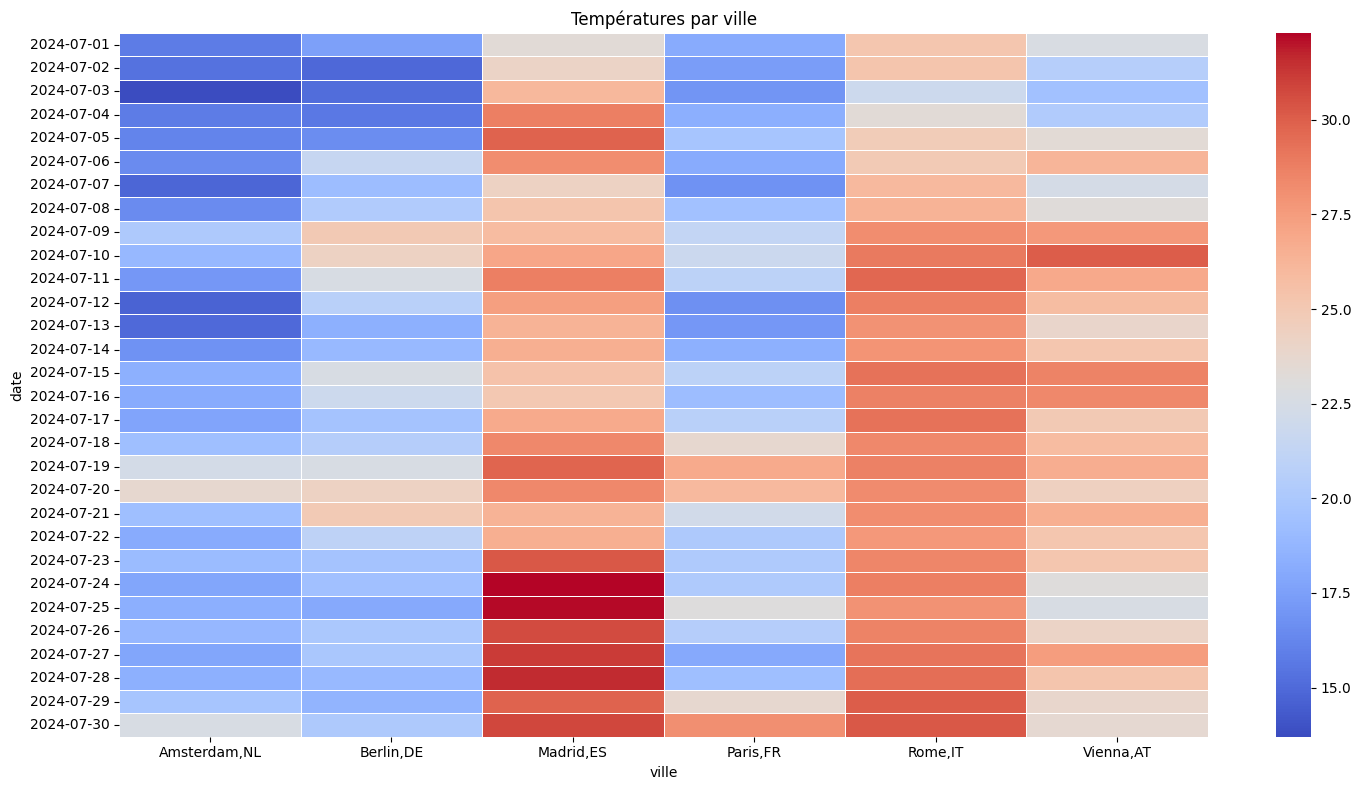

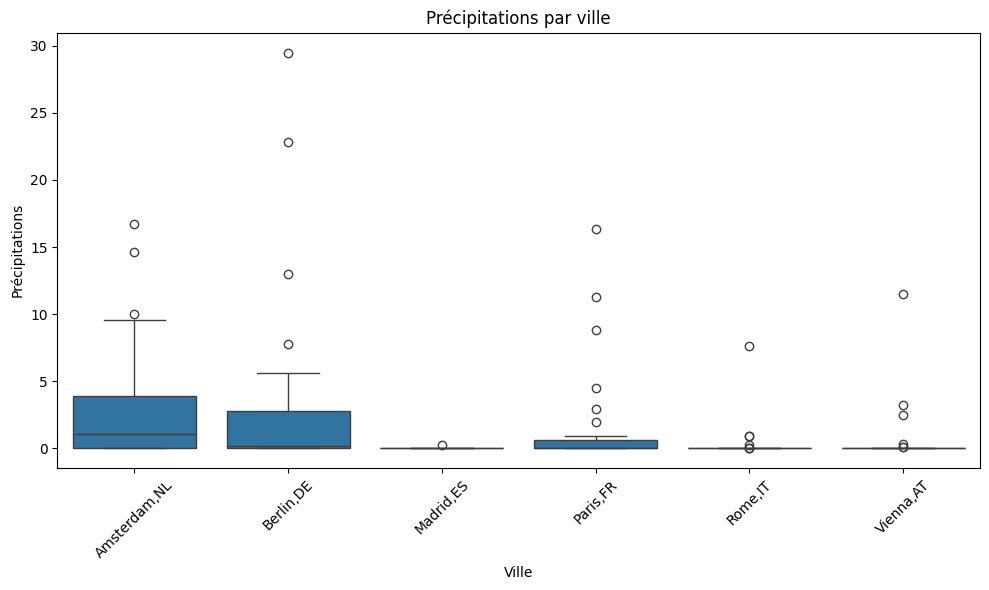

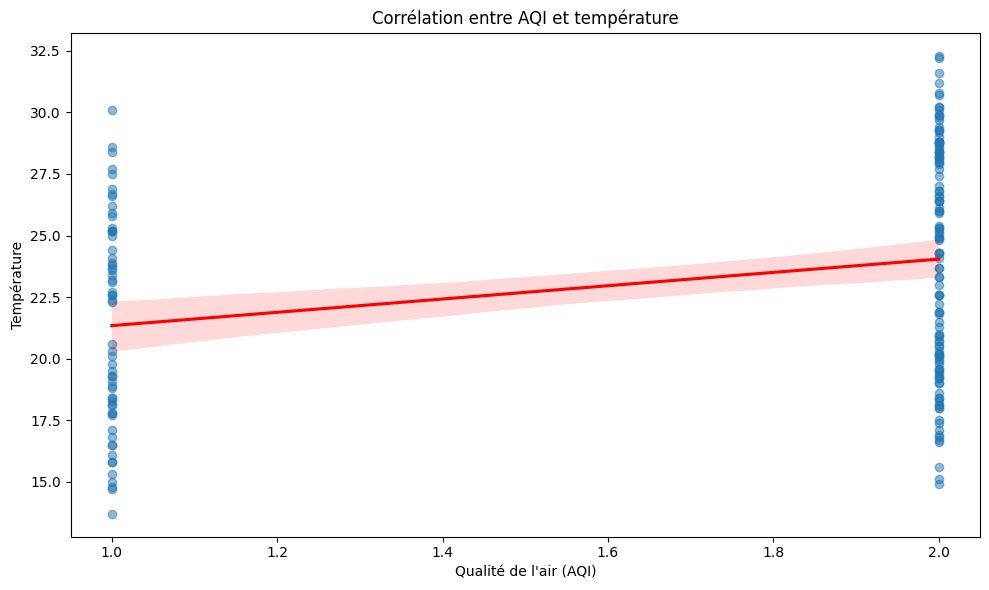

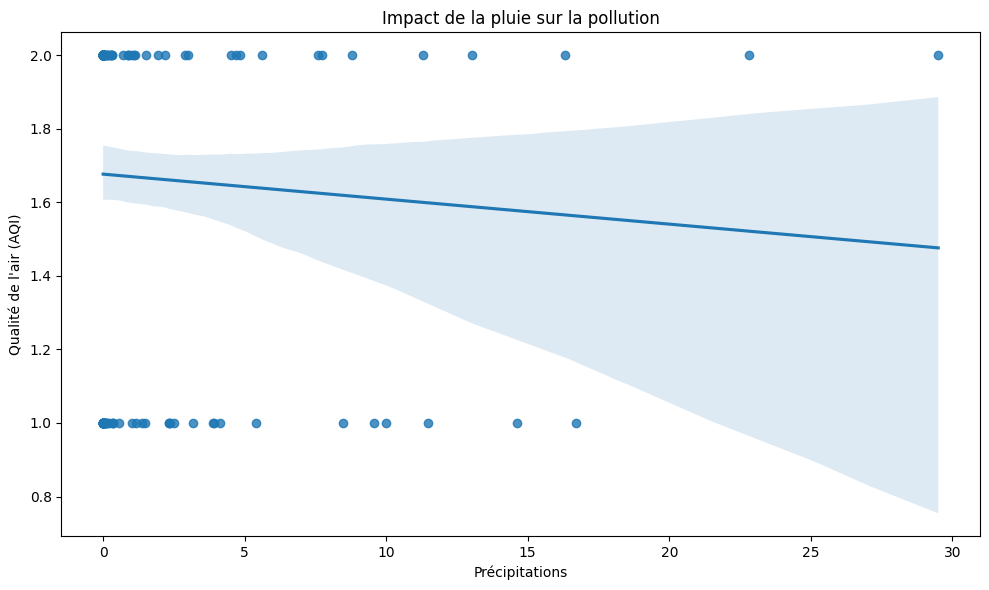

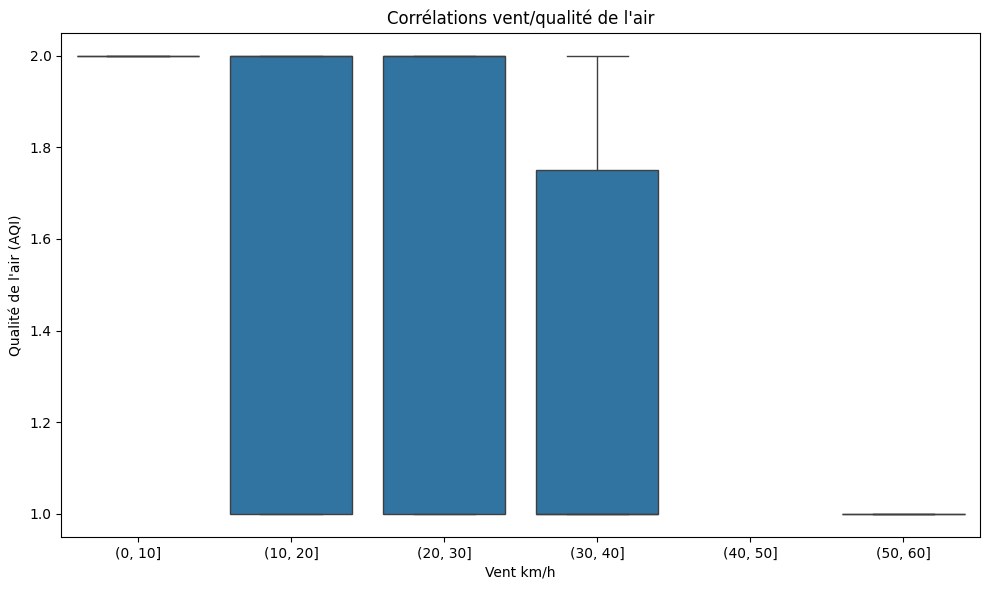

In [146]:
### 💡 Visualisations guidées

# 1. Heatmap des températures par ville et jour
plt.figure(figsize=(15, 8))

# Créez un pivot table : villes en colonnes, dates en lignes
# Utilisez seaborn.heatmap()
pivot_temp = df_final.pivot_table(index='date', columns='ville', values='temperature')
sns.heatmap(pivot_temp, cmap='coolwarm', linewidths=0.5)
plt.title("Températures par ville")
plt.xlabel("ville")
plt.ylabel("date")
plt.tight_layout()
plt.show()
# 2. Boxplot comparatif des précipitations
# Utilisez seaborn.boxplot()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final, x='ville', y='precipitation')
plt.title("Précipitations par ville")
plt.xlabel("Ville")
plt.ylabel("Précipitations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Scatter plot qualité air vs température
# Ajoutez une regression line avec seaborn.regplot()
plt.figure(figsize=(10, 6))
sns.regplot(data=df_with_air_qual, x='aqi', y='temperature', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title("Corrélation entre AQI et température")
plt.xlabel("Qualité de l'air (AQI)")
plt.ylabel("Température")
plt.tight_layout()
plt.show()

#4. Impact de la pluie sur la pollution
# df_with_air_qual['rain_bool'] = df_with_air_qual['precipitation'] > 0
plt.figure(figsize=(10, 6))
sns.regplot(data=df_with_air_qual, x='precipitation', y='aqi')
plt.title("Impact de la pluie sur la pollution")
plt.xlabel("Précipitations")
plt.ylabel("Qualité de l'air (AQI)")
plt.tight_layout()
plt.show()

#5. Corrélations vent/qualité de l'air
df_with_air_qual['vent_bins'] = pd.cut(df_with_air_qual['vent'], bins=[0, 10, 20, 30, 40, 50, 60])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_with_air_qual, x='vent_bins', y='aqi')
plt.title("Corrélations vent/qualité de l'air")
plt.xlabel("Vent km/h")
plt.ylabel("Qualité de l'air (AQI)")
plt.tight_layout()
plt.show()

## Partie 5 : API bonus - Données agricoles

### �� API AgroMonitoring (gratuite)

In [143]:
# API satellite pour l'agriculture
load_dotenv()
AGRO_API = os.getenv("API_KEY_AGROM")
AGRO_BASE_URL = "http://api.agromonitoring.com/agro/1.0"

def get_soil_data(polygon_coordinates, api_key):
    """
    Récupère des données de sol via satellite
    URL : http://api.agromonitoring.com/agro/1.0/

    Données disponibles :
    - Indices de végétation (NDVI)
    - Humidité du sol
    - Température de surface
    """
    pass



**Défi avancé :** Créez des recommandations de plantation basées sur :
- Données météo des 30 derniers jours
- Prévisions à 5 jours
- Qualité de l'air
- Indices de végétation satellite



## 🏆 Livrables attendus

### 📊 Dashboard météo
Créez un tableau de bord contenant :
1. **Aperçu temps réel** des 6 villes
2. **Graphiques de tendances** sur 30 jours
3. **Alertes qualité de l'air** (AQI > 100)
4. **Recommandations agricoles** par ville

Résumé exécutif
Vienne connaît actuellement un temps légère pluie avec une température de 19.45°C.
L'humidité est de 77% et la vitesse du vent est de 8.05 m/s.
Les conditions sont globalement normales pour la saison.
Métriques clés


,Température (°C),Humidité (%),Vent (m/s),Pression (hPa),Visibilité (m)
Vienne,19.45,77,8.05,1014,10000



Visualisations


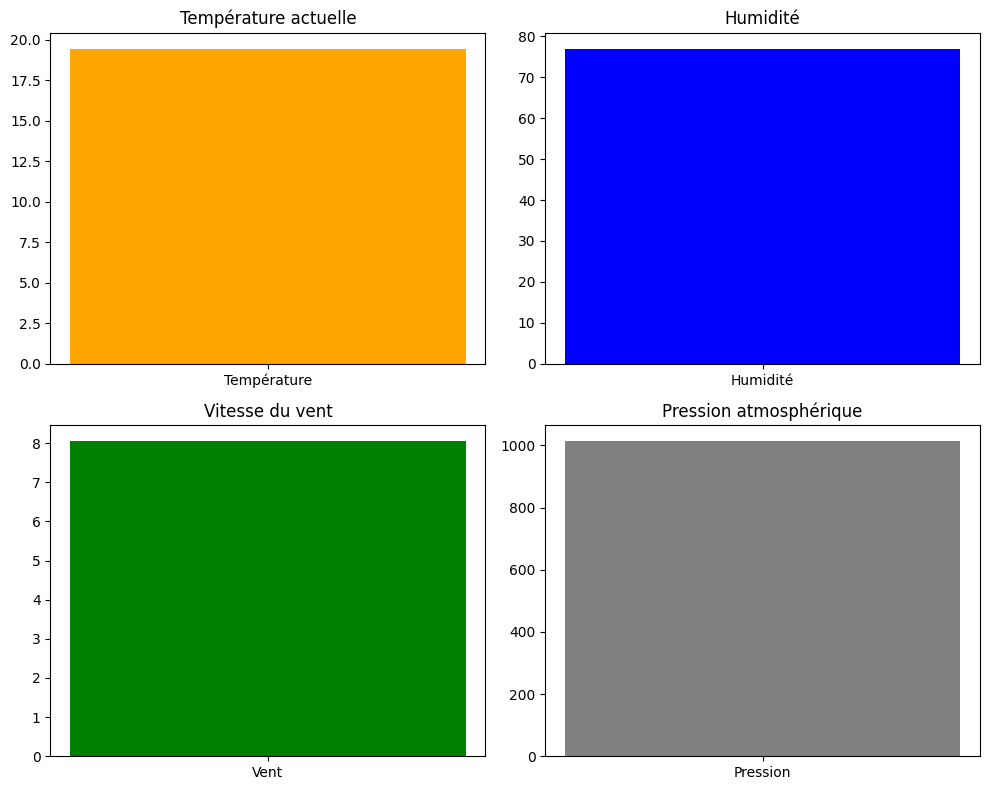


Recommandations
- Aucune recommandation spécifique à signaler.


In [ ]:
### 📱 Format de présentation

def generate_weather_report(city_data):
    """
    Génère un rapport automatisé

    Format :
    - Résumé exécutif (3 lignes)
    - Métriques clés (tableaux)
    - Graphiques (4 visualisations)
    - Recommandations (bullet points)
    """
    if not city_data:
        print("Aucune donnée fournie.")
        return

    # Résumé exécutif
    print("Résumé exécutif")
    name = city_data.get("name", "Ville inconnue")
    temp = city_data['main']['temp']
    weather = city_data['weather'][0]['description']
    humidity = city_data['main']['humidity']
    wind = city_data['wind']['speed']

    print(f"{name} connaît actuellement un temps {weather} avec une température de {temp}°C.")
    print(f"L'humidité est de {humidity}% et la vitesse du vent est de {wind} m/s.")
    print("Les conditions sont globalement normales pour la saison.")

    # Métriques clés
    print("Métriques clés")
    df = pd.DataFrame({
        "Température (°C)": [temp],
        "Humidité (%)": [humidity],
        "Vent (m/s)": [wind],
        "Pression (hPa)": [city_data['main']['pressure']],
        "Visibilité (m)": [city_data.get('visibility', np.nan)]
    }, index=[name])
    display(df)

    # Graphiques
    print("\nVisualisations")
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    axs[0, 0].bar(["Température"], [temp], color='orange')
    axs[0, 0].set_title("Température actuelle")

    axs[0, 1].bar(["Humidité"], [humidity], color='blue')
    axs[0, 1].set_title("Humidité")

    axs[1, 0].bar(["Vent"], [wind], color='green')
    axs[1, 0].set_title("Vitesse du vent")

    pressure = city_data['main']['pressure']
    axs[1, 1].bar(["Pression"], [pressure], color='grey')
    axs[1, 1].set_title("Pression atmosphérique")

    plt.tight_layout()
    plt.show()

    # Recommandations
    print("\nRecommandations")
    recs = []
    if temp > 30:
        recs.append("Hydratez-vous fréquemment en raison de la chaleur.")
    if humidity > 80:
        recs.append("Risque élevé d'inconfort dû à l'humidité.")
    if wind > 10:
        recs.append("Attention aux rafales de vent.")
    if not recs:
        recs.append("Aucune recommandation spécifique à signaler.")

    for r in recs:
        print(f"- {r}")

data_berlin = get_weather_data("Berlin,DE", API_KEY)
data_paris = get_weather_data("Paris,FR", API_KEY)
data_amsterdam = get_weather_data("Amsterdam,NL", API_KEY)
data_madrid = get_weather_data("Madrid,ES", API_KEY)
data_vienna = get_weather_data("Vienna,AT", API_KEY)
generate_weather_report(data_vienna)

---

## 🎓 Critères d'évaluation

- [ ] **APIs fonctionnelles** : Toutes les connexions API marchent
- [ ] **Gestion d'erreurs** : Code robuste avec try/except
- [ ] **Qualité des données** : Validation et nettoyage
- [ ] **Visualisations** : Graphiques informatifs et esthétiques
- [ ] **Insights business** : Recommandations basées sur les données

### 🔗 Préparation au Notebook 2
Le prochain notebook utilisera une vraie base de données PostgreSQL hébergée pour analyser des données de ventes e-commerce, en croisant avec vos données météo pour des analyses géolocalisées.

### 📚 APIs alternatives (si quotas dépassés)
- **WeatherAPI** : 1M appels/mois gratuits
- **AccuWeather** : 50 appels/jour gratuits  
- **Climatiq** : Données climat et carbone
- **NASA APIs** : Données satellite gratuites